In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('Dataset .csv')
df.head()  # Showing first few rows


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
# Splitting  the cuisines by comma, remove extra spaces, and flattening the list
all_cuisines = df['Cuisines'].dropna().str.split(',').explode().str.strip()

# Counting the most common cuisines
top_cuisines = all_cuisines.value_counts().head(3)


In [ ]:
# Total number of restaurants (rows)
total_restaurants = len(df)

# Initializing a dictionary to hold percentages
percentages = {}

for cuisine in top_cuisines.index:
    # Counting how many restaurants that is serving this cuisine
    count = df['Cuisines'].dropna().str.contains(cuisine, case=False).sum()
    percentages[cuisine] = (count / total_restaurants) * 100


TOP 3 CUISINES AND THEIR PERCENTAGE


In [ ]:
print("Top 3 Cuisines and Their Percentages:")
for cuisine, pct in percentages.items():
    print(f"{cuisine}: {pct:.2f}%")


Top 3 Cuisines and Their Percentages:
North Indian: 41.46%
Chinese: 28.61%
Fast Food: 20.80%


DISPLAYING THE TOP 3 CUSINES AND THIER PERCENTYAGE IN PICTORIAL REPRESENTATION


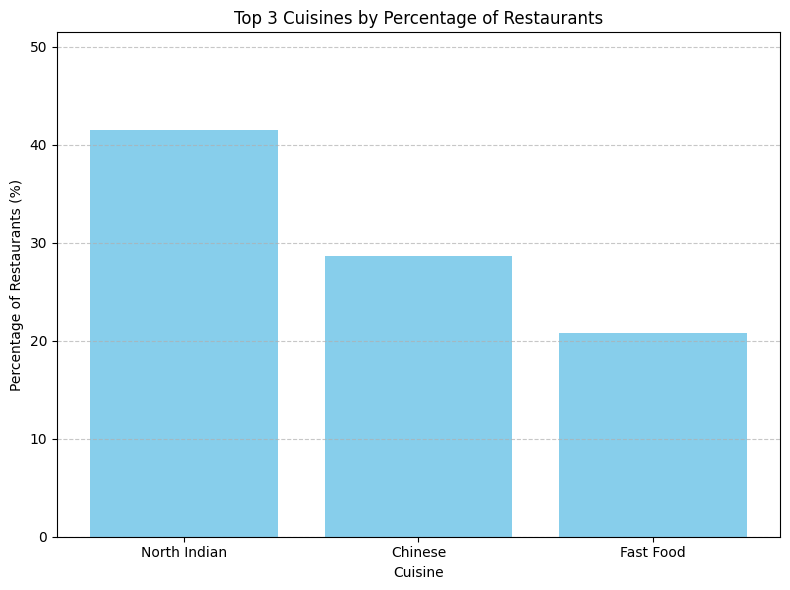

In [ ]:
import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(percentages.keys(), percentages.values(), color='skyblue')
plt.title('Top 3 Cuisines by Percentage of Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Percentage of Restaurants (%)')
plt.ylim(0, max(percentages.values()) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
